In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.special import erfc

C:\Users\ACER\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


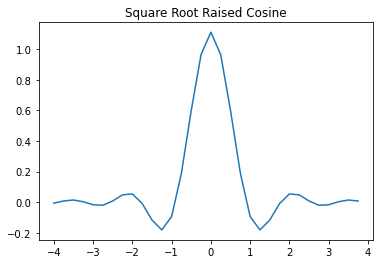

In [23]:
#raised cosine filter
beta = 0.4 # roll of factor
nsym = 8
L = 4 # over sampling ration
tsym = 1 # symbol period
t = np.arange(-(nsym/2),(nsym/2),1/L)

num = np.sin(np.pi*t*(1-beta)/tsym)+((4*beta*t/tsym)*np.cos(np.pi*t*(1+beta)/tsym))
den = np.pi*t*(1-(4*beta*t/tsym)**2)/tsym


den[t==0] = 1 #to prevent divison by zero


p = (1/np.sqrt(tsym))*num/den




p[t==0] = (1/tsym)*((1-beta)+4*beta/np.pi)

temp = (beta/np.sqrt(2*tsym))*((1+2/np.pi)*np.sin(np.pi/(4*beta))) + (1-2/np.pi)*np.cos(np.pi/(4*beta))
p[t==tsym/(4*beta)] = temp
p[t==-tsym/(4*beta)] = temp

filtDelay = (len(p)-1)/2

plt.plot(t,p)
plt.title("Square Root Raised Cosine")
plt.show()

[0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


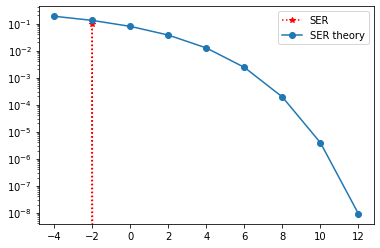

In [17]:
N = 10 #%Number of symbols to transmit
L=4 #Oversampling factor (L samples per symbol period)

d = np.round(np.random.rand(1,N)) #msg bits
u=2*d-1


#Upsampling  
v = np.vstack((u,np.zeros(((L-1),u.shape[1])))) 

v = v.T.flatten() #%insert L-1 zero between each symbols

#passing the signal through raised cosine filter
s = np.convolve(v,p) #sihnal is generated



serr=[]
snr = np.arange(-4,13,2)
No=1/(10**(snr/10))
sigma=np.sqrt(No/2) # Finding Noise power

for i in range(len(sigma)):
    
    noise=sigma[i]*np.random.randn(len(s)) #noise
    r=s+noise # Adding noise through channel 
    
    
    #Matched filtering with SRRC pulse shape
    vcap = np.convolve(r,p) ##convolve received signal with Rx SRRC filter
    
    
    ucap = vcap[np.int32(2*filtDelay):-np.int32(2*filtDelay):L]/L
    output = (ucap >= 0).astype(int) #thresolding at value 0
    serr.append((np.sum(output != d)/N)) 

print(serr)
    
M=2
gamma = 10**(snr/10)

SER_theory=2*(1-1/M)*0.5*erfc(np.sqrt(3*gamma/(M**2-1)))


plt.semilogy(snr,serr,'r*:',label="SER")
plt.semilogy(snr,SER_theory,'o-',label="SER theory")
plt.legend()
plt.show()


In [43]:
vcap

array([ 6.71109188e-04, -3.53054294e-03,  1.51268486e-03,  6.33376177e-03,
        5.17128045e-03, -1.87243466e-03, -1.15675597e-02, -6.24716902e-03,
        1.90134434e-02,  3.27122028e-02,  1.11264928e-02, -3.74116309e-02,
       -7.44625992e-02, -6.57343362e-02,  7.78195264e-03,  1.41902401e-01,
        3.05650063e-01,  4.57325045e-01,  5.50978637e-01,  5.36548318e-01,
        3.87539697e-01,  1.23116370e-01, -1.75715652e-01, -3.69845621e-01,
       -3.55925402e-01, -1.19972213e-01,  2.15457033e-01,  4.01569234e-01,
        1.74850751e-01, -5.77269169e-01, -1.75437549e+00, -3.05273531e+00,
       -4.12766515e+00, -4.74948390e+00, -4.90460501e+00, -4.75543508e+00,
       -4.53931092e+00, -4.43106238e+00, -4.45480070e+00, -4.51672576e+00,
       -4.51434706e+00, -4.39914515e+00, -4.20093220e+00, -4.04263505e+00,
       -4.05620669e+00, -4.27710069e+00, -4.61724967e+00, -4.93873973e+00,
       -5.12086123e+00, -5.10437641e+00, -4.89752025e+00, -4.54512852e+00,
       -4.10474767e+00, -

In [48]:
vcap[int(2*filtDelay):-int(2*filtDelay):L]/L

array([-0.76318383, -1.18885877, -1.12918144, -1.01065876, -1.23468493,
       -1.13628213, -0.8514375 , -1.28114665,  0.79483194, -0.6361976 ])

In [26]:
d = np.round(np.random.rand(1,N)) #msg bits
2*d-1

array([[ 1.,  1., -1., -1., -1.,  1.,  1., -1.,  1., -1.]])

In [49]:
x = np.array([1,2,3,4,5])

In [54]:
x[1:-1:2]

array([2, 4])

In [39]:
u.shape

(1, 10)

In [37]:
v.T

array([[-1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [-1.,  0.,  0.,  0.],
       [-1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [-1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [-1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.]])

In [36]:
v.T.flatten()

array([-1.,  0.,  0.,  0.,  1.,  0.,  0.,  0., -1.,  0.,  0.,  0., -1.,
        0.,  0.,  0.,  1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.])

In [28]:
np.vstack((u,np.zeros(((L-1),u.shape[1]))))

array([[-1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [38]:
np.zeros(((L-1),u.shape[1]))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [41]:
u.shape[1]

10

In [13]:
np.zeros(((L-1),u.shape[1])).shape

(3, 100)

In [14]:
u.shape

(1, 100)

In [22]:
v.T.flatten()

array([-1.,  0.,  0.,  0., -1.,  0.,  0.,  0., -1.,  0.,  0.,  0., -1.,
        0.,  0.,  0., -1.,  0.,  0.,  0., -1.,  0.,  0.,  0., -1.,  0.,
        0.,  0., -1.,  0.,  0.,  0.,  1.,  0.,  0.,  0., -1.,  0.,  0.,
        0.])